# MNIST Handwritten Digit Classification

#### import library using PyTorch

In [ ]:
import torch as torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

### 1. Loading MNIST Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root= './data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root= './data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 179229600.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 96599436.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26870665.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22074772.62it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 2. Visualize MNIST datasets.

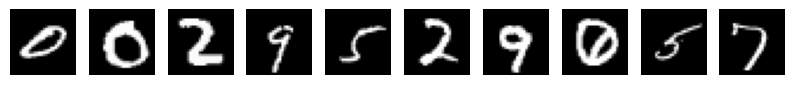

In [ ]:
%matplotlib inline

# Define a function to plot image
def plot_images(images):
  size, axs = plt.subplots(1, len(images), figsize=(10, 5))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

# Get some image from the dataset
image, label = next(iter(train_loader))
plot_images(image[:10])

### 3. Neural Network model.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  # convert + flatten
  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x

net = Net()

### 4. Setup hyperparameter such as Loss Function, Optimizer, Learning Rate, etc.

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epoch = 20

### 5. Training loop and run a training model.

In [ ]:
for epoch in range(epoch):
  net.train()
  running_loss = 0.0

  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = cross_el(output, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'[epoch: {epoch + 1}, {epoch + 1:5d}] loss: {running_loss / 2000:.5f}')

[epoch: 1,     1] loss: 0.98141
[epoch: 2,     2] loss: 0.52595
[epoch: 3,     3] loss: 0.40976
[epoch: 4,     4] loss: 0.35497
[epoch: 5,     5] loss: 0.31959
[epoch: 6,     6] loss: 0.29328
[epoch: 7,     7] loss: 0.27543
[epoch: 8,     8] loss: 0.24943
[epoch: 9,     9] loss: 0.23742
[epoch: 10,    10] loss: 0.22949
[epoch: 11,    11] loss: 0.21965
[epoch: 12,    12] loss: 0.20163
[epoch: 13,    13] loss: 0.20355
[epoch: 14,    14] loss: 0.18625
[epoch: 15,    15] loss: 0.19022
[epoch: 16,    16] loss: 0.18525
[epoch: 17,    17] loss: 0.17335
[epoch: 18,    18] loss: 0.17069
[epoch: 19,    19] loss: 0.16279
[epoch: 20,    20] loss: 0.16554


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    x, y = data
    output = net(x.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total +=1

### 6. Evaluate Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy
accuracy = correct / total
print('Accuracy:', accuracy)

# confusion matrix
y_true = []
y_pred = []

with torch.no_grad():
  for data in test_loader:
    x, y = data
    output = net(x.view(-1, 784))
    for idx, i in enumerate(output):
      y_true.append(y[idx].item())
      y_pred.append(torch.argmax(i).item())

confusion_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)

#precision
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# recall
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
f1_score = f1_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1_score)

Accuracy: 0.9676
Confusion Matrix:
[[ 955    1    1    1    4    4    2    5    2    5]
 [   0 1126    2    0    0    0    0    2    5    0]
 [   2    4  975    9    6    0    4   22   10    0]
 [   1    6    4  972    0    5    0   10    8    4]
 [   1    3    4    0  943    0    2    2    1   26]
 [   4    1    0   16    3  845    7    2    5    9]
 [   4    2    2    0   14    5  927    1    3    0]
 [   0    4    4    0    0    0    0 1013    3    4]
 [   3    1    2    7    2    3    2    5  944    5]
 [   2    1    0    4    6    1    1   16    2  976]]
Precision: 0.9678783701629833
Recall: 0.9676
F1 Score: 0.967603109659023


### 7. Describe and explain your Result.

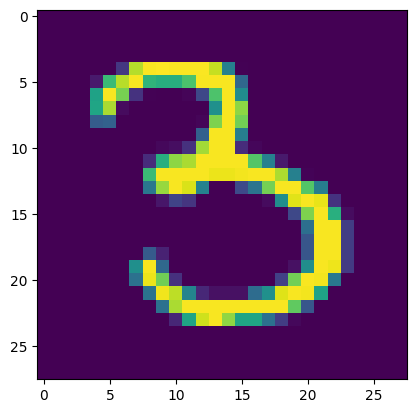

tensor(3)


In [ ]:
plt.imshow(x[3].view(28, 28))
plt.show()
print(torch.argmax(net(x[3].view(-1, 784))[0]))